In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from the Excel file
df = pd.read_excel("D:/GOKLYN INTERNSHIP 2025/3. Project 2/Clean Data/cd.xlsx")

# Display the first 5 rows of the dataset
df.head()

,continent,country,date,population,total_cases,total_cases_per_million,new_cases,new_cases_smoothed,total_deaths,total_deaths_per_million,...,total_tests,new_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,population_density
0,Asia,Afghanistan,2020-01-04,40578801.0,0,0.0,0.0,NaN,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.215477
1,Asia,Afghanistan,2020-01-05,40578801.0,0,0.0,0.0,NaN,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.215477
2,Asia,Afghanistan,2020-01-06,40578801.0,0,0.0,0.0,NaN,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.215477
3,Asia,Afghanistan,2020-01-07,40578801.0,0,0.0,0.0,NaN,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.215477
4,Asia,Afghanistan,2020-01-08,40578801.0,0,0.0,0.0,NaN,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.215477


***Goal Objective***

To analyze the temporal dynamics of the virus spread by quantifying the number, intensity, and frequency of waves, understanding recovery durations between waves, and assessing containment effectiveness over time.

***Task***
Detect and count distinct waves of COVID-19 using peak detection on daily cases.

In [53]:
# ----------- Function Definitions First -----------

# Smooth the series using a rolling average
def smooth_series(series, window=7):
    return series.rolling(window=window, center=True, min_periods=1).mean()

# Detect peaks: local maxima
def detect_peaks(arr):
    peaks = []
    for i in range(1, len(arr) - 1):
        if arr[i] > arr[i - 1] and arr[i] > arr[i + 1]:
            peaks.append(i)
    return peaks

# Detect and count waves for a single country
def detect_waves(country_df):
    country_df['smoothed_cases'] = smooth_series(country_df['new_cases'])
    peaks = detect_peaks(country_df['smoothed_cases'].values)
    
    # Mark peaks
    country_df['wave'] = 0
    for peak in peaks:
        country_df.loc[peak, 'wave'] = 1
    
    wave_count = len(peaks)
    return country_df, peaks, wave_count

# ----------- Now Process All Countries -----------

# Step 1: Prepare to store results
country_wave_counts = []
wave_marked_dfs = []

# Step 2: Loop through each country and apply wave detection
for country in df['country'].unique():
    country_df = df[df['country'] == country].copy().reset_index(drop=True)
    country_df, peaks, wave_count = detect_waves(country_df)
    
    country_wave_counts.append({'Country': country, 'Total Waves': wave_count})
    wave_marked_dfs.append(country_df)

# Step 3: Combine all wave-marked country DataFrames
wave_df = pd.concat(wave_marked_dfs).reset_index(drop=True)

# Step 4: Create summary of total waves per country
wave_summary_df = pd.DataFrame(country_wave_counts).sort_values(by='Total Waves', ascending=False)

# Step 5: Display the result
print("🌊 Total COVID-19 Waves Detected Per Country:")
print(wave_summary_df)


🌊 Total COVID-19 Waves Detected Per Country:
                Country  Total Waves
0           Afghanistan          292
85              Ireland          242
77               Guyana          226
26               Brazil          213
53   Dominican Republic          212
..                  ...          ...
147            Slovenia            0
72               Greece            0
69              Germany            0
152               Spain            0
59              Estonia            0

[176 rows x 2 columns]


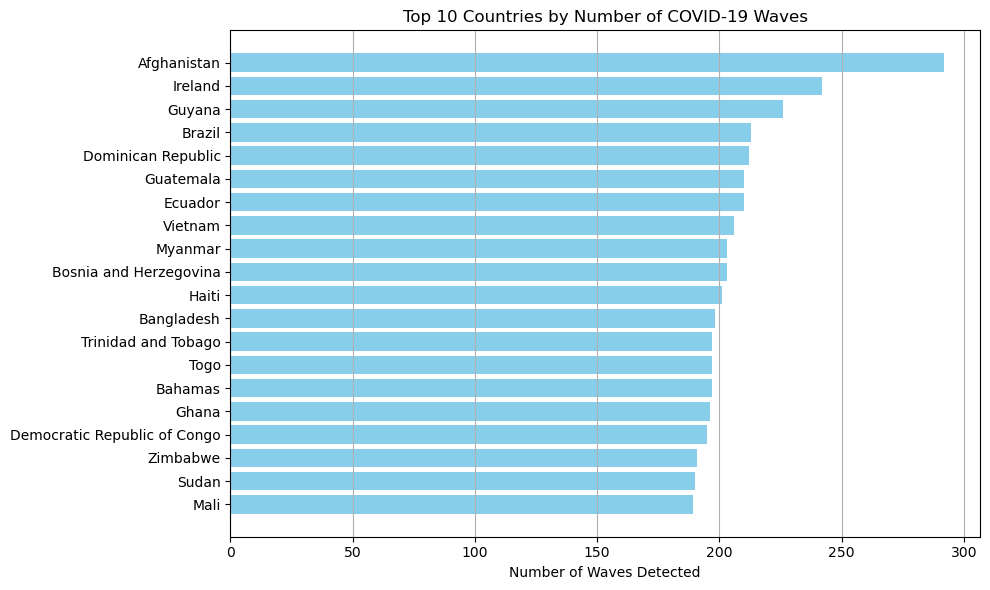

In [54]:
top_waves = wave_summary_df.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_waves['Country'], top_waves['Total Waves'], color='skyblue')
plt.xlabel("Number of Waves Detected")
plt.title("Top 10 Countries by Number of COVID-19 Waves")
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [55]:

# Function to detect and count waves in a country's data
def detect_waves(country_df):
    # Step 1: Smooth the new_cases
    country_df['smoothed_cases'] = smooth_series(country_df['new_cases'])

    # Step 2: Detect peaks
    peaks = detect_peaks(country_df['smoothed_cases'].values)

    # Step 3: Mark and count the waves
    country_df['wave'] = 0
    for idx, peak in enumerate(peaks):
        country_df.loc[peak, 'wave'] = 1  # Mark peak positions

    # Step 4: Count the number of distinct waves (i.e., peaks)
    wave_count = len(peaks)

    return country_df, peaks, wave_count


Number of COVID-19 waves detected in India: 117


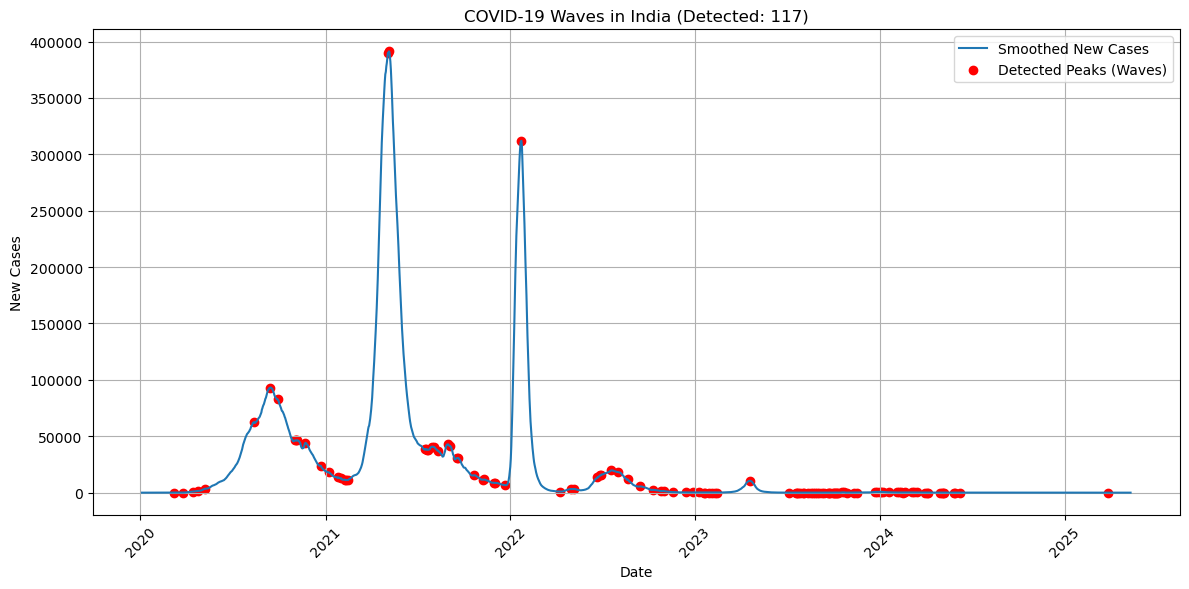

In [56]:
# Example usage for one country, e.g., India
country = 'India'
india_df = df[df['country'] == country].copy().reset_index(drop=True)

# Detect waves
india_df, peak_positions, num_waves = detect_waves(india_df)

# Show number of waves
print(f"Number of COVID-19 waves detected in {country}: {num_waves}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(india_df['date'], india_df['smoothed_cases'], label='Smoothed New Cases')
plt.scatter(india_df['date'].iloc[peak_positions], 
            india_df['smoothed_cases'].iloc[peak_positions], 
            color='red', label='Detected Peaks (Waves)')
plt.title(f"COVID-19 Waves in {country} (Detected: {num_waves})")
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***Task***
Measure wave height (peak value) and duration (start to end).

In [57]:

# Function to find wave start (before peak) and end (after peak)
def find_wave_bounds(arr, peak_idx, threshold=0.2):
    peak_val = arr[peak_idx]
    min_val = threshold * peak_val

    # Go backwards to find start
    start = peak_idx
    while start > 0 and arr[start] > min_val:
        start -= 1

    # Go forward to find end
    end = peak_idx
    while end < len(arr)-1 and arr[end] > min_val:
        end += 1

    return start, end

# Function to compute wave height and duration
def analyze_waves(country_df):
    country_df['smoothed_cases'] = smooth_series(country_df['new_cases'])

    cases = country_df['smoothed_cases'].values
    dates = country_df['date'].values

    peaks = detect_peaks(cases)

    wave_data = []

    for peak in peaks:
        start, end = find_wave_bounds(cases, peak)
        height = cases[peak]
        duration = (pd.to_datetime(dates[end]) - pd.to_datetime(dates[start])).days

        wave_data.append({
            'Peak Date': dates[peak],
            'Start Date': dates[start],
            'End Date': dates[end],
            'Wave Height': height,
            'Wave Duration (days)': duration
        })

    return pd.DataFrame(wave_data)


In [58]:
# Example for one country
country = 'India'
india_df = df[df['country'] == country].copy().reset_index(drop=True)

wave_info_df = analyze_waves(india_df)
print(f"Waves in {country}:")
print(wave_info_df)


Waves in India:
     Peak Date Start Date   End Date  Wave Height  Wave Duration (days)
0   2020-03-07 2020-02-29 2024-07-05     5.857143                  1588
1   2020-03-25 2020-03-16 2023-11-03    89.428571                  1327
2   2020-04-14 2020-03-30 2022-12-09   996.428571                   984
3   2020-04-23 2020-04-01 2022-11-28  1540.571429                   971
4   2020-05-08 2020-04-08 2022-11-12  3517.000000                   948
..         ...        ...        ...          ...                   ...
112 2024-05-08 2023-11-21 2024-06-09   111.428571                   201
113 2024-05-27 2023-11-10 2024-06-11    54.142857                   214
114 2024-05-29 2023-11-10 2024-06-11    51.857143                   214
115 2024-06-07 2020-03-08 2024-07-05    26.714286                  1580
116 2025-03-28 2025-03-21 2025-05-09     1.285714                    49

[117 rows x 5 columns]


In [59]:
# Get top 10 waves by height
top_10_waves = wave_info_df.sort_values(by='Wave Height', ascending=False).head(10)

# Display the result
print("Top 10 Waves by Height:")
print(top_10_waves)


Top 10 Waves by Height:
    Peak Date Start Date   End Date    Wave Height  Wave Duration (days)
20 2021-05-06 2021-04-01 2021-06-13  391279.571429                    73
19 2021-05-04 2021-04-01 2021-06-13  389803.142857                    73
38 2022-01-23 2022-01-04 2022-02-11  311982.142857                    38
6  2020-09-14 2020-06-28 2021-01-03   93198.571429                   189
7  2020-09-28 2020-06-24 2021-01-12   82866.571429                   202
5  2020-08-12 2020-06-17 2021-02-02   62511.571429                   230
9  2020-11-04 2020-06-04 2021-11-24   46423.000000                   538
10 2020-11-06 2020-06-04 2021-11-24   46334.857143                   538
8  2020-11-02 2020-06-04 2021-11-24   46269.000000                   538
11 2020-11-22 2020-06-02 2021-11-27   44187.000000                   543


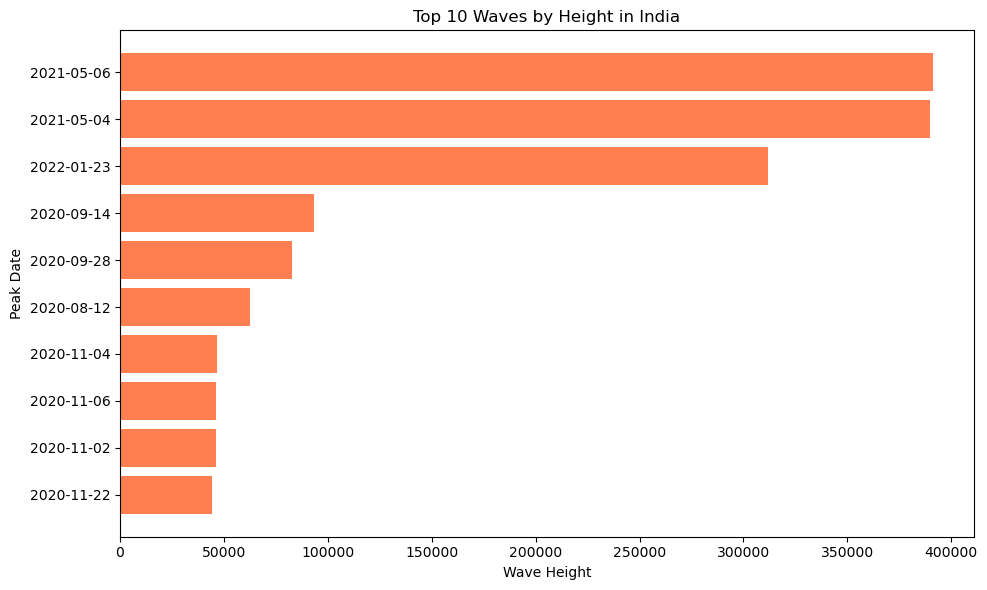

In [60]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_waves['Peak Date'].astype(str), top_10_waves['Wave Height'], color='coral')
plt.xlabel('Wave Height')
plt.ylabel('Peak Date')
plt.title(f'Top 10 Waves by Height in {country}')
plt.gca().invert_yaxis()  # highest wave on top
plt.tight_layout()
plt.show()

***Task***
Calculate time between waves (wave recurrence interval).

In [61]:
# Function to calculate wave recurrence intervals
def calculate_recurrence_intervals(country_df):
    country_df['smoothed_cases'] = smooth_series(country_df['new_cases'])
    cases = country_df['smoothed_cases'].values
    dates = pd.to_datetime(country_df['date'].values)

    # Get peak indices
    peak_indices = detect_peaks(cases)

    # Get peak dates
    peak_dates = dates[peak_indices]

    # Calculate intervals between successive peaks
    recurrence_intervals = []
    for i in range(1, len(peak_dates)):
        interval = (peak_dates[i] - peak_dates[i-1]).days
        recurrence_intervals.append({
            'From Peak': peak_dates[i-1],
            'To Peak': peak_dates[i],
            'Interval (days)': interval
        })

    return pd.DataFrame(recurrence_intervals), peak_dates


In [62]:
# Example for one country
country = 'India'
india_df = df[df['country'] == country].copy().reset_index(drop=True)

recurrence_df, peak_dates = calculate_recurrence_intervals(india_df)

print(f"Wave Recurrence Intervals in {country}:")
print(recurrence_df)


Wave Recurrence Intervals in India:
     From Peak    To Peak  Interval (days)
0   2020-03-07 2020-03-25               18
1   2020-03-25 2020-04-14               20
2   2020-04-14 2020-04-23                9
3   2020-04-23 2020-05-08               15
4   2020-05-08 2020-08-12               96
..         ...        ...              ...
111 2024-05-06 2024-05-08                2
112 2024-05-08 2024-05-27               19
113 2024-05-27 2024-05-29                2
114 2024-05-29 2024-06-07                9
115 2024-06-07 2025-03-28              294

[116 rows x 3 columns]


In [63]:
# Sort by interval to find longest and shortest intervals
sorted_recurrence = recurrence_df.sort_values(by='Interval (days)', ascending=False)

# Top 10 longest intervals
top_10_intervals = sorted_recurrence.head(10)
print("Top 10 Longest Wave Recurrence Intervals:")
print(top_10_intervals)

# Least 10 shortest intervals
least_10_intervals = sorted_recurrence.tail(10).sort_values(by='Interval (days)', ascending=True)
print("\nLeast 10 Shortest Wave Recurrence Intervals:")
print(least_10_intervals)


Top 10 Longest Wave Recurrence Intervals:
     From Peak    To Peak  Interval (days)
115 2024-06-07 2025-03-28              294
4   2020-05-08 2020-08-12               96
18  2021-02-14 2021-05-04               79
38  2022-01-23 2022-04-10               77
62  2023-04-20 2023-07-05               76
20  2021-05-06 2021-07-16               71
61  2023-02-14 2023-04-20               65
41  2022-05-06 2022-06-22               47
91  2023-11-17 2023-12-23               36
7   2020-09-28 2020-11-02               35

Least 10 Shortest Wave Recurrence Intervals:
    From Peak    To Peak  Interval (days)
82 2023-10-02 2023-10-04                2
81 2023-09-30 2023-10-02                2
79 2023-09-23 2023-09-25                2
78 2023-09-21 2023-09-23                2
30 2021-09-18 2021-09-20                2
56 2023-01-19 2023-01-21                2
68 2023-08-02 2023-08-04                2
65 2023-07-21 2023-07-23                2
64 2023-07-19 2023-07-21                2
19 2021-05-04 2021-

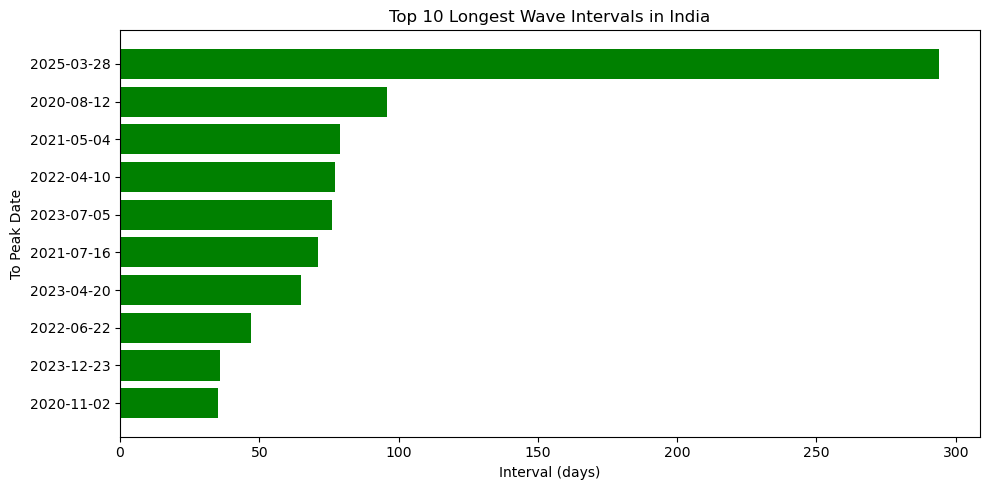

In [64]:
# Plotting longest intervals
plt.figure(figsize=(10, 5))
plt.barh(top_10_intervals['To Peak'].astype(str), top_10_intervals['Interval (days)'], color='green')
plt.xlabel('Interval (days)')
plt.ylabel('To Peak Date')
plt.title(f'Top 10 Longest Wave Intervals in {country}')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


***Task***
Compute peak-to-trough recovery times and rate of decline.

In [65]:
# Find the next trough after a given peak (lowest point before next rise)
def find_next_trough(arr, peak_idx, lookahead=60):
    end_idx = min(peak_idx + lookahead, len(arr) - 1)
    trough_idx = peak_idx + 1
    for i in range(peak_idx + 1, end_idx):
        if arr[i] < arr[trough_idx]:
            trough_idx = i
    return trough_idx if trough_idx != peak_idx + 1 else None

# Compute recovery time and decline rate
def compute_recovery_metrics(country_df):
    country_df['smoothed_cases'] = smooth_series(country_df['new_cases'])
    cases = country_df['smoothed_cases'].values
    dates = pd.to_datetime(country_df['date'].values)

    peak_indices = detect_peaks(cases)

    recovery_data = []

    for peak_idx in peak_indices:
        trough_idx = find_next_trough(cases, peak_idx)

        if trough_idx and trough_idx > peak_idx:
            peak_val = cases[peak_idx]
            trough_val = cases[trough_idx]
            recovery_days = (dates[trough_idx] - dates[peak_idx]).days
            decline_rate = (peak_val - trough_val) / recovery_days if recovery_days != 0 else None

            recovery_data.append({
                'Peak Date': dates[peak_idx],
                'Peak Value': peak_val,
                'Trough Date': dates[trough_idx],
                'Trough Value': trough_val,
                'Recovery Time (days)': recovery_days,
                'Rate of Decline': decline_rate
            })

    return pd.DataFrame(recovery_data)


In [66]:
# Example for one country
country = 'India'
india_df = df[df['country'] == country].copy().reset_index(drop=True)

recovery_df = compute_recovery_metrics(india_df)
print(f"Peak-to-Trough Recovery Info for {country}:")
print(recovery_df)


Peak-to-Trough Recovery Info for India:
     Peak Date    Peak Value Trough Date  Trough Value  Recovery Time (days)  \
0   2020-08-12  62511.571429  2020-08-14  61798.428571                     2   
1   2020-09-14  93198.571429  2020-11-12  43832.142857                    59   
2   2020-09-28  82866.571429  2020-11-16  39223.857143                    49   
3   2020-11-02  46269.000000  2020-12-31  19445.000000                    59   
4   2020-11-04  46423.000000  2021-01-02  18934.428571                    59   
..         ...           ...         ...           ...                   ...   
100 2024-05-08    111.428571  2024-07-05      0.000000                    58   
101 2024-05-27     54.142857  2024-07-05      0.000000                    39   
102 2024-05-29     51.857143  2024-07-05      0.000000                    37   
103 2024-06-07     26.714286  2024-07-05      0.000000                    28   
104 2025-03-28      1.285714  2025-05-09      0.000000                    42   


In [67]:
# Peak Dates with High Peak + Short Recovery

# Define thresholds
high_peak_threshold = recovery_df['Peak Value'].quantile(0.75)
short_recovery_threshold = recovery_df['Recovery Time (days)'].quantile(0.25)

# Filter the waves
efficient_recovery_waves = recovery_df[
    (recovery_df['Peak Value'] >= high_peak_threshold) &
    (recovery_df['Recovery Time (days)'] <= short_recovery_threshold)
]

# Show results
print("✅ Waves with High Peak but Short Recovery Time:")
print(efficient_recovery_waves[['Peak Date', 'Peak Value', 'Recovery Time (days)', 'Rate of Decline']])


✅ Waves with High Peak but Short Recovery Time:
   Peak Date    Peak Value  Recovery Time (days)  Rate of Decline
0 2020-08-12  62511.571429                     2       356.571429


In [68]:
# Declined rapidly (high rate of decline) in a short recovery time.

# Set thresholds
high_decline_threshold = recovery_df['Rate of Decline'].quantile(0.75)
short_recovery_threshold = recovery_df['Recovery Time (days)'].quantile(0.25)

# Filter for high decline rate and short recovery time
fast_crash_waves = recovery_df[
    (recovery_df['Rate of Decline'] >= high_decline_threshold) &
    (recovery_df['Recovery Time (days)'] <= short_recovery_threshold)
]

# Display the key details
print("📉 Waves with High Decline Rate and Short Recovery Time:")
print(fast_crash_waves[['Peak Date', 'Peak Value', 'Recovery Time (days)', 'Rate of Decline']])


📉 Waves with High Decline Rate and Short Recovery Time:
    Peak Date    Peak Value  Recovery Time (days)  Rate of Decline
0  2020-08-12  62511.571429                     2       356.571429
9  2021-01-26  13517.142857                    14       169.469388
10 2021-02-01  12712.857143                     8       196.035714


***Task***
Visualize the standard deviation or volatility of daily case counts.

In [69]:
# Compute rolling standard deviation (volatility) on new daily cases
india_df['volatility'] = india_df['new_cases'].rolling(window=14).std()


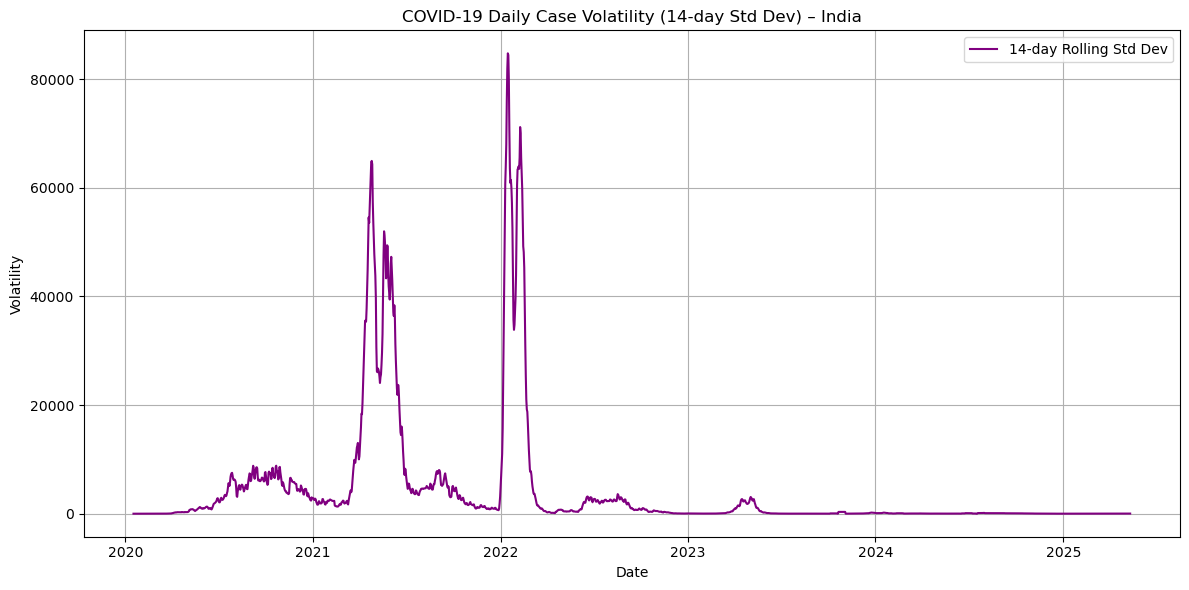

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(india_df['date'], india_df['volatility'], color='purple', label='14-day Rolling Std Dev')
plt.title(f"COVID-19 Daily Case Volatility (14-day Std Dev) – {country}")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


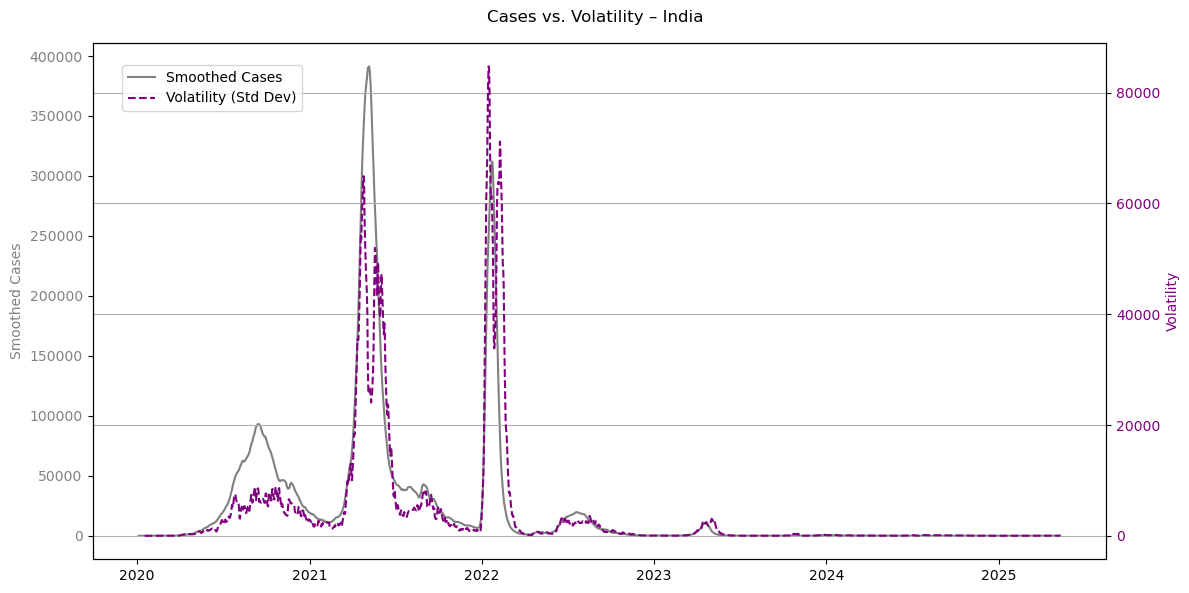

In [71]:
#1. 📉 Overlay Volatility and Smoothed Cases
#Purpose: Show how case counts and volatility interact during waves.


fig, ax1 = plt.subplots(figsize=(12, 6))

# Smoothed cases line
ax1.plot(india_df['date'], india_df['smoothed_cases'], color='gray', label='Smoothed Cases')
ax1.set_ylabel("Smoothed Cases", color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

# Volatility line on second y-axis
ax2 = ax1.twinx()
ax2.plot(india_df['date'], india_df['volatility'], color='purple', label='Volatility (Std Dev)', linestyle='--')
ax2.set_ylabel("Volatility", color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

fig.suptitle(f"Cases vs. Volatility – {country}")
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
fig.tight_layout()
plt.grid(True)
plt.show()


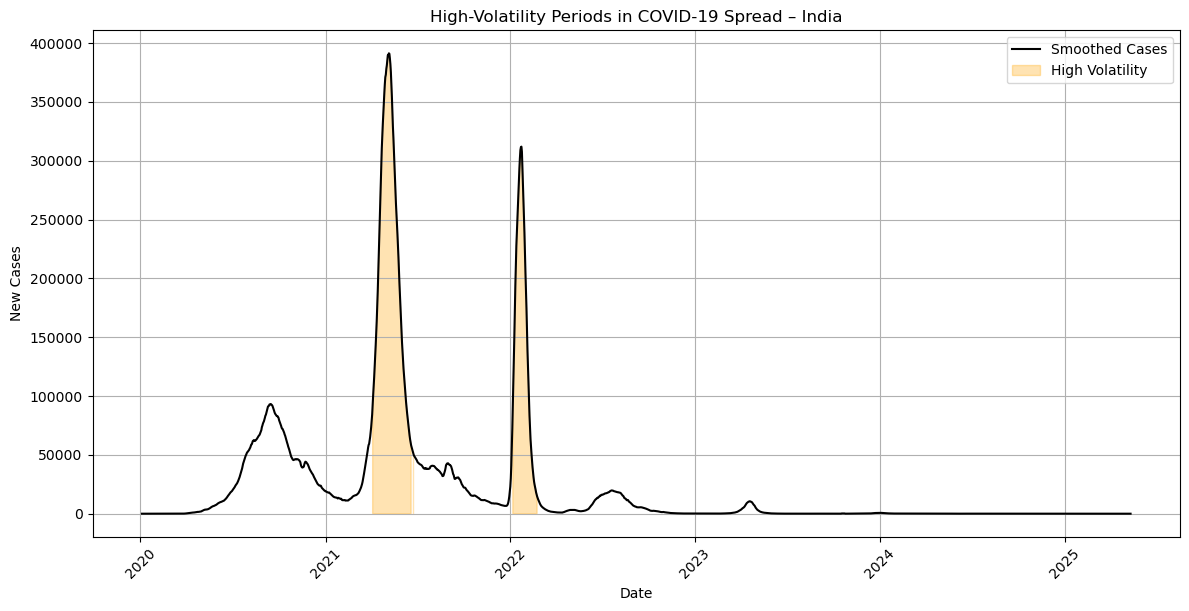

In [72]:

#2. 🟥 Highlight High-Volatility Periods on Timeline
#Purpose: Identify unstable phases where volatility exceeds a threshold.

vol_threshold = india_df['volatility'].mean() + india_df['volatility'].std()

plt.figure(figsize=(12, 6))
plt.plot(india_df['date'], india_df['smoothed_cases'], label='Smoothed Cases', color='black')

# Shade high-volatility regions
high_vol = india_df['volatility'] > vol_threshold
plt.fill_between(india_df['date'], 0, india_df['smoothed_cases'],
                 where=high_vol, color='orange', alpha=0.3, label='High Volatility')

plt.title(f"High-Volatility Periods in COVID-19 Spread – {country}")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


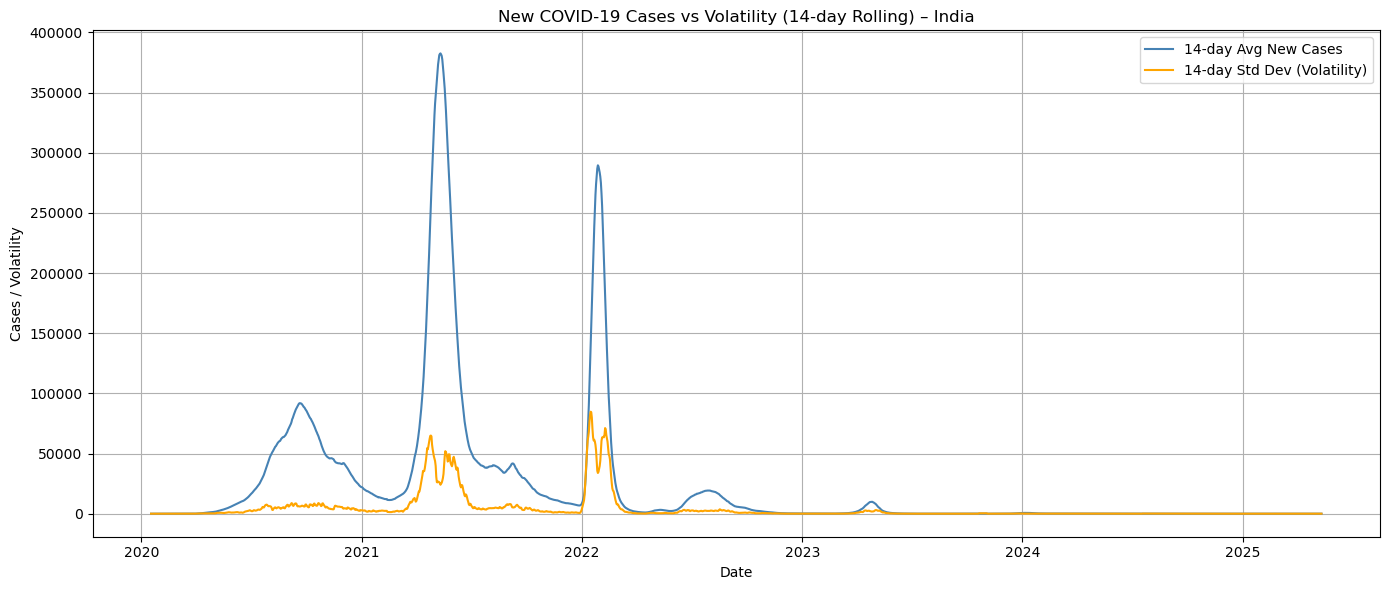

In [73]:
# Compute 14-day rolling average and std dev (if not already computed)
india_df['avg_14d'] = india_df['new_cases'].rolling(14).mean()

# Plot
plt.figure(figsize=(14, 6))

plt.plot(india_df['date'], india_df['avg_14d'], label='14-day Avg New Cases', color='steelblue')
plt.plot(india_df['date'], india_df['volatility'], label='14-day Std Dev (Volatility)', color='orange')

plt.title("New COVID-19 Cases vs Volatility (14-day Rolling) – India")
plt.xlabel("Date")
plt.ylabel("Cases / Volatility")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


***Task***
Compare the nature of waves across countries (e.g., intense short-wave vs slow long wave).

In [74]:
# Get unique list of countries
countries = df['country'].unique()

# Initialize list to collect wave data
all_wave_data = []

# Loop over each country to analyze waves
for country in countries:
    country_df = df[df['country'] == country].copy().reset_index(drop=True)
    wave_df = analyze_waves(country_df)
    
    # Add country name to each row
    wave_df['Country'] = country
    wave_df['Wave Number'] = range(1, len(wave_df) + 1)
    
    all_wave_data.append(wave_df)

# Combine all into one DataFrame
all_waves_df = pd.concat(all_wave_data, ignore_index=True)

# Clean column names for consistency
all_waves_df.rename(columns={'Wave Height': 'Peak Value', 'Wave Duration (days)': 'Duration (days)'}, inplace=True)

# Now create the summary
summary = all_waves_df.groupby('Country').agg({
    'Peak Value': ['mean', 'max'],
    'Duration (days)': ['mean', 'max'],
    'Wave Number': 'count'
}).round(1)

# Flatten column names
summary.columns = ['Avg Peak', 'Max Peak', 'Avg Duration', 'Max Duration', 'Total Waves']

# Display the summary
print(summary)


             Avg Peak  Max Peak  Avg Duration  Max Duration  Total Waves
Country                                                                 
Afghanistan     149.9    2095.6         594.2        1517.0          292
Albania         234.3    2210.3         533.0        1141.0          139
Algeria         178.1    2177.6         691.1        1183.0          113
Andorra          65.9     588.6         293.7         653.0          110
Angola          124.6    1712.6         369.1         708.0          169
...               ...       ...           ...           ...          ...
Vanuatu          84.9     261.9          77.8         135.0           29
Vietnam        9095.4  274025.3         489.9        1121.0          206
Yemen            19.6     109.4         183.7         522.0          112
Zambia          328.2    3870.9         369.0         848.0          141
Zimbabwe        184.0    4579.7         394.0         975.0          191

[161 rows x 5 columns]


In [75]:
summary.head(20)

,Avg Peak,Max Peak,Avg Duration,Max Duration,Total Waves
Country,,,,,
Afghanistan,149.9,2095.6,594.2,1517.0,292
Albania,234.3,2210.3,533.0,1141.0,139
Algeria,178.1,2177.6,691.1,1183.0,113
Andorra,65.9,588.6,293.7,653.0,110
Angola,124.6,1712.6,369.1,708.0,169
Anguilla,17.0,47.4,73.2,251.0,21
Antigua and Barbuda,20.9,101.3,93.3,266.0,89
Argentina,11125.4,111509.9,581.2,950.0,75
Armenia,531.0,3399.0,482.9,815.0,91


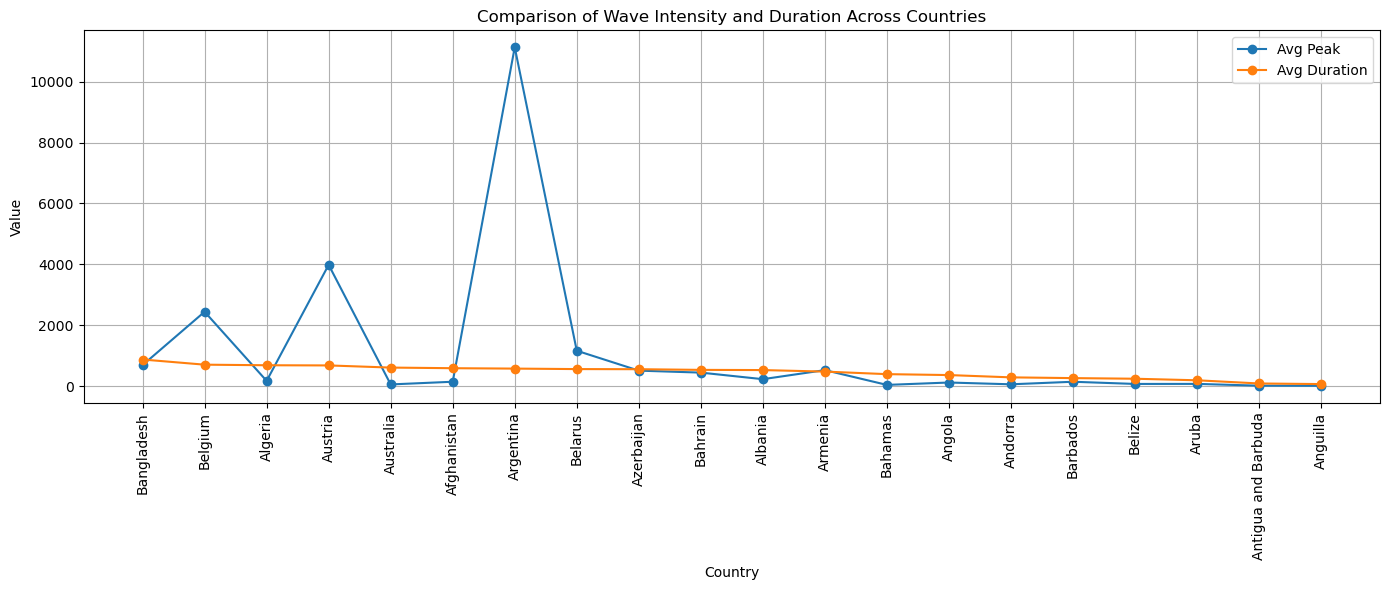

In [76]:
import matplotlib.pyplot as plt

# First, sort the summary by Avg Duration or Avg Peak (optional for clarity)
summary_sorted = summary.head(20).sort_values(by='Avg Duration', ascending=False)

# Plot line chart for Avg Peak and Avg Duration
plt.figure(figsize=(14, 6))
plt.plot(summary_sorted.index, summary_sorted['Avg Peak'], marker='o', label='Avg Peak')
plt.plot(summary_sorted.index, summary_sorted['Avg Duration'], marker='o', label='Avg Duration')

plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Comparison of Wave Intensity and Duration Across Countries')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


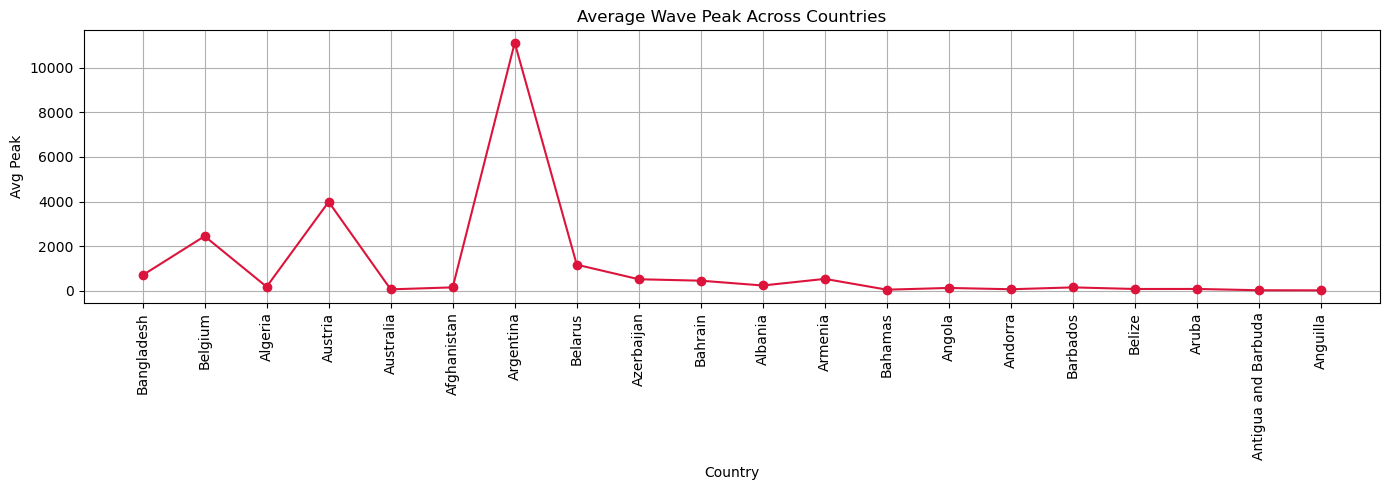

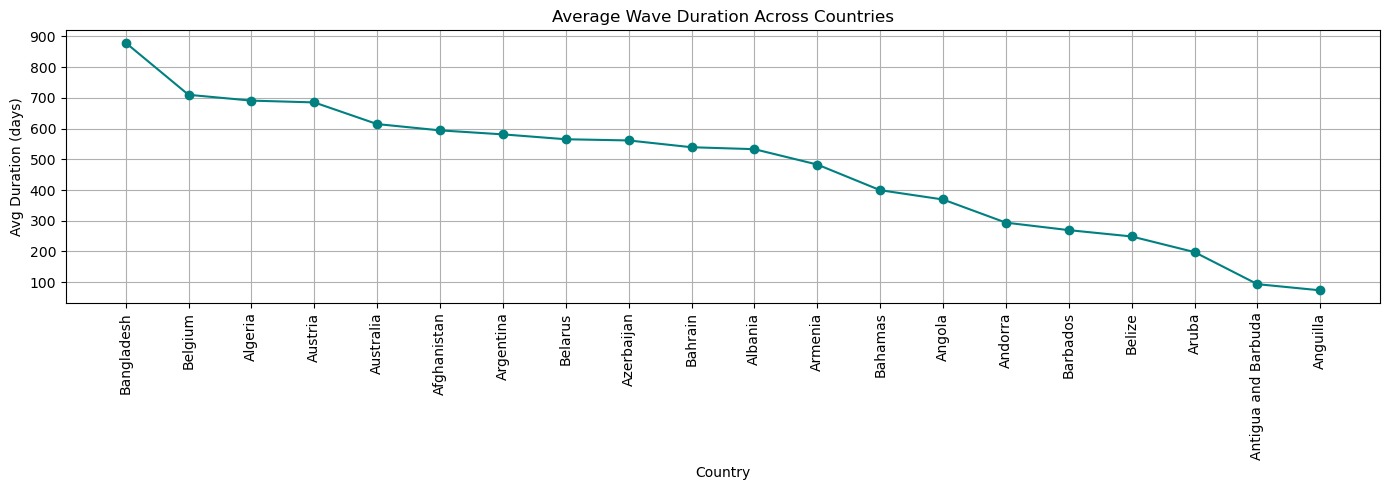

In [77]:
# Plot Avg Peak
plt.figure(figsize=(14, 5))
plt.plot(summary_sorted.index, summary_sorted['Avg Peak'], marker='o', color='crimson')
plt.xticks(rotation=90)
plt.title('Average Wave Peak Across Countries')
plt.xlabel('Country')
plt.ylabel('Avg Peak')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Avg Duration
plt.figure(figsize=(14, 5))
plt.plot(summary_sorted.index, summary_sorted['Avg Duration'], marker='o', color='teal')
plt.xticks(rotation=90)
plt.title('Average Wave Duration Across Countries')
plt.xlabel('Country')
plt.ylabel('Avg Duration (days)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [78]:
print(summary.sort_values(by='Total Waves', ascending=False).head(10))


                        Avg Peak  Max Peak  Avg Duration  Max Duration  \
Country                                                                  
Afghanistan                149.9    2095.6         594.2        1517.0   
Ireland                   1040.2   22479.6         881.8        1893.0   
Guyana                      77.8    1024.7         403.6         924.0   
Brazil                   36316.9  189526.0         587.7        1107.0   
Dominican Republic         624.9    6378.0         613.3        1107.0   
Guatemala                 1084.6    5462.7         819.9        1118.0   
Ecuador                   1058.4    9197.3         580.1        1048.0   
Vietnam                   9095.4  274025.3         489.9        1121.0   
Myanmar                    353.7    5831.3         587.5        1335.0   
Bosnia and Herzegovina     336.1    2464.3         630.9        1157.0   

                        Total Waves  
Country                              
Afghanistan                     292

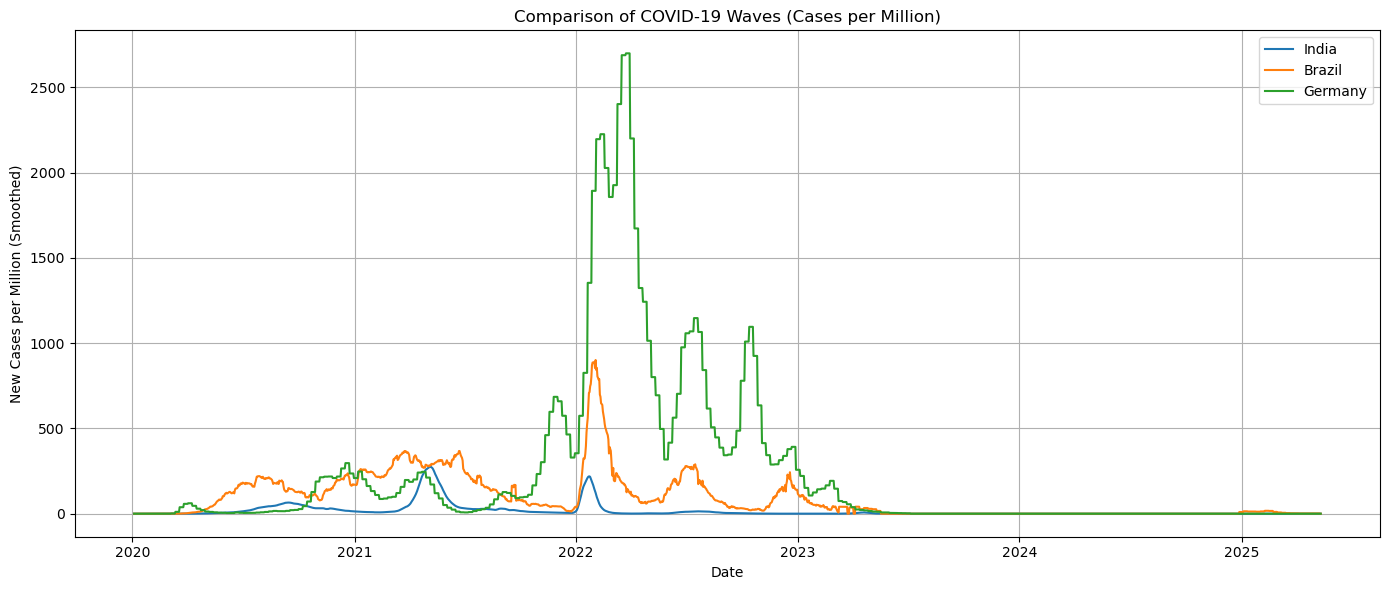

In [79]:
# Smooth function
def smooth_series(series, window=7):
    return series.rolling(window=window, center=True, min_periods=1).mean()

# Select countries to compare
countries_to_compare = ['India', 'Brazil', 'Germany']

# Normalize by population and smooth
plt.figure(figsize=(14, 6))
for country in countries_to_compare:
    sub_df = df[df['country'] == country].copy()
    sub_df['date'] = pd.to_datetime(sub_df['date'])
    sub_df = sub_df.sort_values('date')
    
    # Normalize: new cases per million
    sub_df['cases_per_million'] = (sub_df['new_cases'] / sub_df['population']) * 1e6
    sub_df['smoothed_cases'] = smooth_series(sub_df['cases_per_million'])

    plt.plot(sub_df['date'], sub_df['smoothed_cases'], label=country)

plt.title("Comparison of COVID-19 Waves (Cases per Million)")
plt.xlabel("Date")
plt.ylabel("New Cases per Million (Smoothed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
